In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df=pd.read_csv('matches.csv')
pd.set_option('display.max_columns', None)

In [58]:
df.shape

(32, 18)

In [59]:
df.head()

season         team1        team2        date  match_number  \
0  2023/24       England  New Zealand  2023/10/05             1   
1  2023/24      Pakistan  Netherlands  2023/10/06             2   
2  2023/24   Afghanistan   Bangladesh  2023/10/07             3   
3  2023/24  South Africa    Sri Lanka  2023/10/07             4   
4  2023/24     Australia        India  2023/10/08             5   

                                          venue        city  toss_winner  \
0                         Narendra Modi Stadium   Ahmedabad  New Zealand   
1            Rajiv Gandhi International Stadium   Hyderabad  Netherlands   
2  Himachal Pradesh Cricket Association Stadium  Dharamsala   Bangladesh   
3                          Arun Jaitley Stadium       Delhi    Sri Lanka   
4                        MA Chidambaram Stadium     Chennai    Australia   

  toss_decision     player_of_match          umpire1           umpire2  \
0         field          R Ravindra  HDPK Dharmasena       Nitin Menon   
1         field        Saud Shakeel     AT Holdstock          CM Brown   
2         field  Mehedi Hasan Miraz        JS Wilson   HDPK Dharmasena   
3         field          AK Markram   RK Illingworth      Sharfuddoula   
4           bat            KL Rahul      CB Gaffaney  RA Kettleborough   

  reserve_umpire  match_referee        winner  winner_runs  winner_wickets  \
0   Sharfuddoula      J Srinath   New Zealand          NaN             9.0   
1     PR Reiffel       JJ Crowe      Pakistan         81.0             NaN   
2      M Erasmus     AJ Pycroft    Bangladesh          NaN             6.0   
3       AG Wharf      J Srinath  South Africa        102.0             NaN   
4   AT Holdstock  RB Richardson         India          NaN             6.0   

  match_type  
0      Group  
1      Group  
2      Group  
3      Group  
4      Group

In [60]:
df.columns

Index(['season', 'team1', 'team2', 'date', 'match_number', 'venue', 'city',
       'toss_winner', 'toss_decision', 'player_of_match', 'umpire1', 'umpire2',
       'reserve_umpire', 'match_referee', 'winner', 'winner_runs',
       'winner_wickets', 'match_type'],
      dtype='object')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   season           32 non-null     object 
 1   team1            32 non-null     object 
 2   team2            32 non-null     object 
 3   date             32 non-null     object 
 4   match_number     32 non-null     int64  
 5   venue            32 non-null     object 
 6   city             32 non-null     object 
 7   toss_winner      32 non-null     object 
 8   toss_decision    32 non-null     object 
 9   player_of_match  32 non-null     object 
 10  umpire1          32 non-null     object 
 11  umpire2          32 non-null     object 
 12  reserve_umpire   31 non-null     object 
 13  match_referee    32 non-null     object 
 14  winner           32 non-null     object 
 15  winner_runs      16 non-null     float64
 16  winner_wickets   16 non-null     float64
 17  match_type       3

In [62]:
df.drop(['season','date', 'match_number','player_of_match', 'umpire1', 'umpire2',
       'reserve_umpire', 'match_referee', 'winner', 'winner_runs',
       'winner_wickets', 'match_type','city'],axis='columns',inplace=True)

df.shape

(32, 5)

In [63]:
df.head()

team1        team2                                         venue  \
0       England  New Zealand                         Narendra Modi Stadium   
1      Pakistan  Netherlands            Rajiv Gandhi International Stadium   
2   Afghanistan   Bangladesh  Himachal Pradesh Cricket Association Stadium   
3  South Africa    Sri Lanka                          Arun Jaitley Stadium   
4     Australia        India                        MA Chidambaram Stadium   

   toss_winner toss_decision  
0  New Zealand         field  
1  Netherlands         field  
2   Bangladesh         field  
3    Sri Lanka         field  
4    Australia           bat

In [64]:
for column in df.columns:
    print(f'{column}: {df[column].unique()}')

team1: ['England' 'Pakistan' 'Afghanistan' 'South Africa' 'Australia'
 'New Zealand' 'Sri Lanka' 'Bangladesh' 'Netherlands' 'India']
team2: ['New Zealand' 'Netherlands' 'Bangladesh' 'Sri Lanka' 'India' 'Pakistan'
 'Australia' 'England' 'South Africa' 'Afghanistan']
venue: ['Narendra Modi Stadium' 'Rajiv Gandhi International Stadium'
 'Himachal Pradesh Cricket Association Stadium' 'Arun Jaitley Stadium'
 'MA Chidambaram Stadium'
 'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium'
 'Maharashtra Cricket Association Stadium' 'M Chinnaswamy Stadium'
 'Wankhede Stadium' 'Eden Gardens']
toss_winner: ['New Zealand' 'Netherlands' 'Bangladesh' 'Sri Lanka' 'Australia'
 'Afghanistan' 'India' 'England' 'South Africa' 'Pakistan']
toss_decision: ['field' 'bat']


<Axes: xlabel='toss_winner', ylabel='count'>

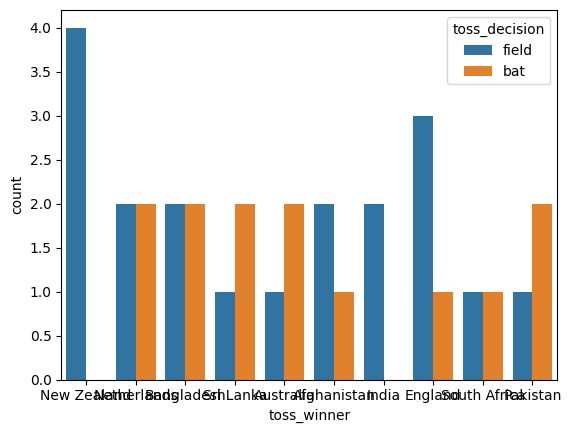

In [65]:
sns.countplot(data=df, x="toss_winner", hue="toss_decision")

In [66]:
from sklearn.preprocessing import LabelEncoder

In [67]:
le=LabelEncoder()
toss_mapping = {}

for column in df.columns:
    df[column] = le.fit_transform(df[column])
    toss_mapping[column] = dict(zip(le.classes_, le.transform(le.classes_)))

toss_mapping

{'team1': {'Afghanistan': 0,
  'Australia': 1,
  'Bangladesh': 2,
  'England': 3,
  'India': 4,
  'Netherlands': 5,
  'New Zealand': 6,
  'Pakistan': 7,
  'South Africa': 8,
  'Sri Lanka': 9},
 'team2': {'Afghanistan': 0,
  'Australia': 1,
  'Bangladesh': 2,
  'England': 3,
  'India': 4,
  'Netherlands': 5,
  'New Zealand': 6,
  'Pakistan': 7,
  'South Africa': 8,
  'Sri Lanka': 9},
 'venue': {'Arun Jaitley Stadium': 0,
  'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium': 1,
  'Eden Gardens': 2,
  'Himachal Pradesh Cricket Association Stadium': 3,
  'M Chinnaswamy Stadium': 4,
  'MA Chidambaram Stadium': 5,
  'Maharashtra Cricket Association Stadium': 6,
  'Narendra Modi Stadium': 7,
  'Rajiv Gandhi International Stadium': 8,
  'Wankhede Stadium': 9},
 'toss_winner': {'Afghanistan': 0,
  'Australia': 1,
  'Bangladesh': 2,
  'England': 3,
  'India': 4,
  'Netherlands': 5,
  'New Zealand': 6,
  'Pakistan': 7,
  'South Africa': 8,
  'Sri Lanka': 9},
 'toss_decision': {'bat': 

In [68]:
X=df.drop('toss_decision',axis='columns')
y=df['toss_decision']

In [69]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42,shuffle=True)

In [70]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [71]:
ensembled_classifier=RandomForestClassifier(random_state=42)

In [72]:
ensembled_classifier.fit(X_train,y_train)
y_pred=ensembled_classifier.predict(X_test)
acc=accuracy_score(y_pred,y_test)
acc

0.5

In [73]:
svc=SVC()
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
acc=accuracy_score(y_pred,y_test)
acc

0.8

In [74]:
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
acc=accuracy_score(y_pred,y_test)
acc

0.4

In [75]:
svc=SVC()
svc.fit(X,y)
y_pred=svc.predict(X)
acc=accuracy_score(y_pred,y)
acc

0.90625

In [76]:
import pickle
pickle_out = open("toss_decision.pkl","wb")
pickle.dump(svc, pickle_out)
pickle_out.close()